In [1]:
import librosa as lr
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy import signal

import IPython.display as ipd

In [21]:
filename = "302_AUDIO.wav"

In [22]:
y, sr = lr.load(filename)
print(y.shape)

print("Sample rate: ", sr)

y = lr.util.normalize(y)

(4811311,)
Sample rate:  22050


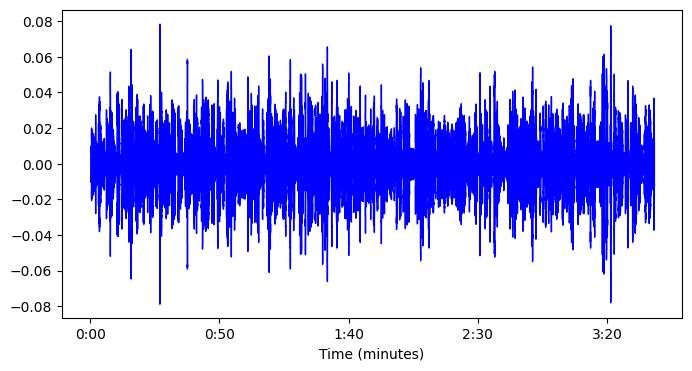

In [21]:
plt.figure(figsize=(8,4))
lr.display.waveshow(y, axis="m", color="blue");

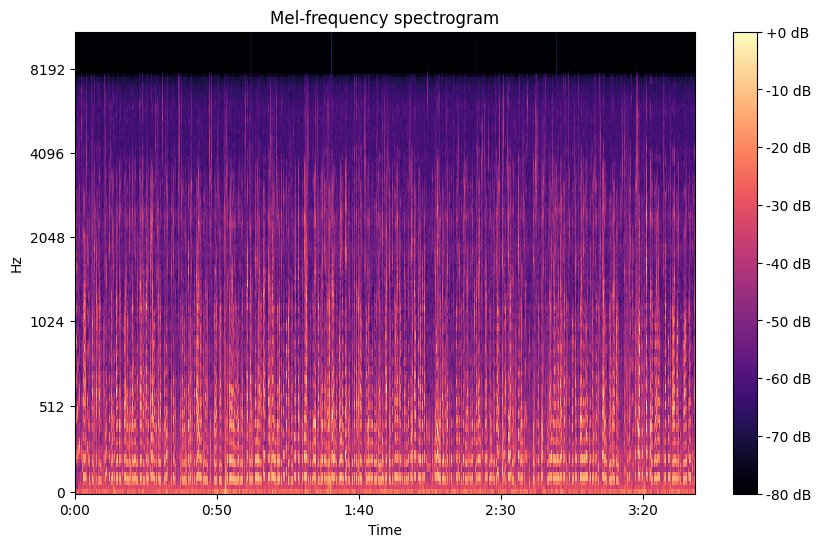

In [5]:
# create mel spectrogram
S = lr.feature.melspectrogram(y=y, sr=sr, n_mels=128)
S_DB = lr.power_to_db(S, ref=np.max)

plt.figure(figsize=(10, 6))
lr.display.specshow(S_DB, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency spectrogram')
plt.show()

# Some Audio Cleaning Techniques

These are not required as of now. Since audio extracted based on timestamps from transcipt don't contain much noise. 

Calculating Power Spectral Density to find the frequency with maximum power. Other frequencies are just noise. So, we can remove them by applying a bandpass filter.

In [30]:
f, S = signal.welch(y, sr, nperseg=4*1024)
f.shape, S.shape

((2049,), (2049,))

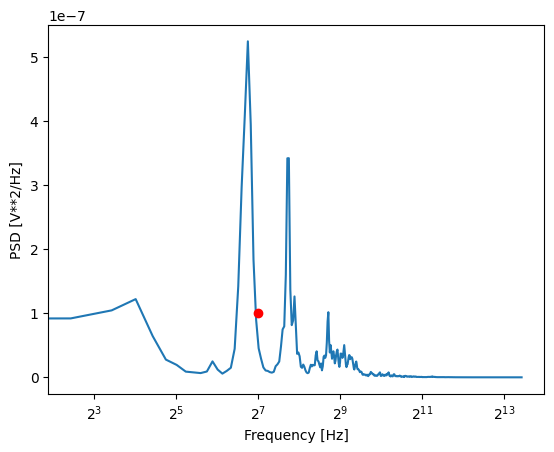

In [31]:
# Plot the data
plt.plot(f, S)
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')

plt.xscale('log', base=2)  # Set x-axis to base-2 log scale
# plt.xticks(ticks, tick_labels)  # Set the custom ticks and labels

plt.plot(128, 1e-7, 'ro')  # Mark the point at 2^8

plt.show()


In [8]:
y = y[:60*sr] # extracting first 60 seconds for computation speed
y_fft = np.fft.fft(y)
psd = np.abs(y_fft * np.conj(y_fft) / len(y))
freq = np.fft.fftfreq(len(psd), 1/sr)
L = np.arange(1, len(y)//2, dtype=int)

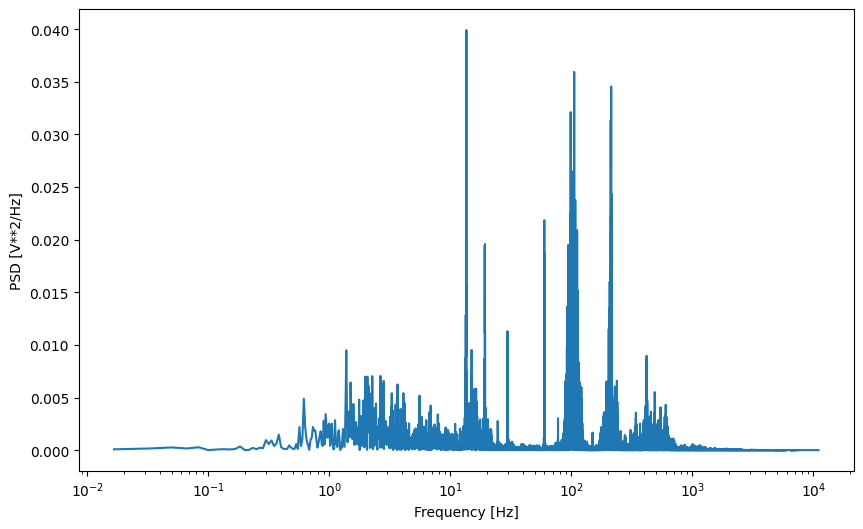

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(freq[L], psd[L])
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.xscale('log')
plt.show()

In [10]:
indices = psd > 0.01
psd_clean = psd * indices
y_fft_clean = y_fft * indices
y_clean = np.real(np.fft.ifft(y_fft_clean))

In [ ]:
# save the cleaned audio
wavfile.write("cleaned_audio.wav", sr, y_clean)

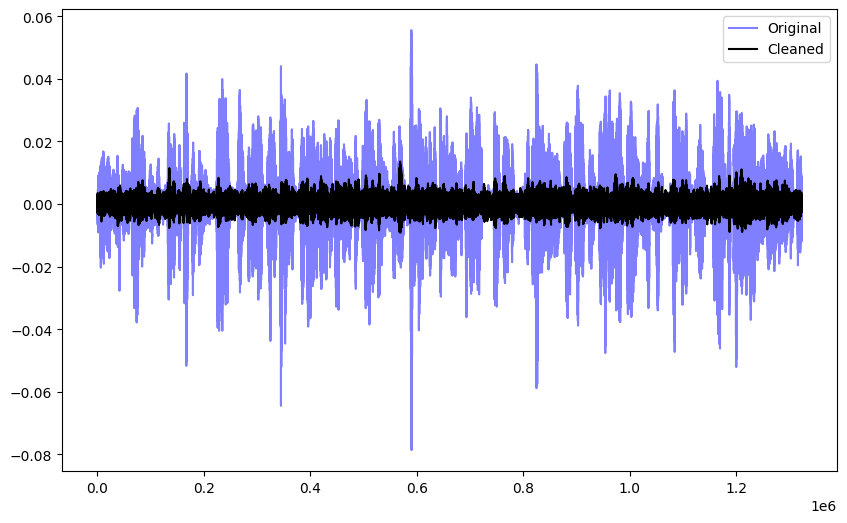

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(y, label='Original', alpha=0.5, color='blue')
plt.plot(y_clean, label='Cleaned', color='black')
plt.legend()
plt.show()


# lowpass filter

removing noise from the signal by applying a lowpass filter.

In [18]:
y = y[:60*sr]
b, a = signal.butter(4, 3000, 'low', fs=sr)
y_low = signal.filtfilt(b, a, y)

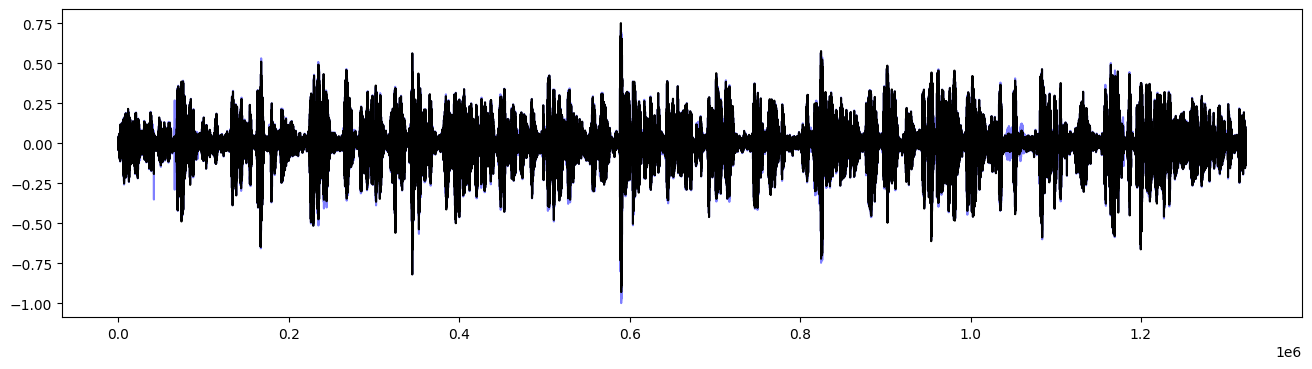

In [19]:
plt.figure(figsize=(16, 4))
plt.plot(y, alpha=0.5, color='blue', label='Original')
plt.plot(y_low, color='black', label='Low-pass filtered')
plt.show()

In [ ]:
ipd.Audio(y_low, rate=sr)

In [ ]:
ipd.Audio(y, rate=sr)

In [ ]:
S = lr.feature.melspectrogram(y=y_low, sr=sr, n_mels=128)
S_DB = lr.power_to_db(S, ref=np.max)

plt.figure(figsize=(10, 6))
lr.display.specshow(S_DB, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency spectrogram')
plt.show()